# K-Nearest Neighbors
CMP5101 notes (Tevfik Aytekin)


K-nearest neighbors is a non-parametric method which can be used for both classification and regression.

### K-NN Classification

A new instance is classified according to its k nearest neighbors. Consider the example below where there are 2 classes of objects:

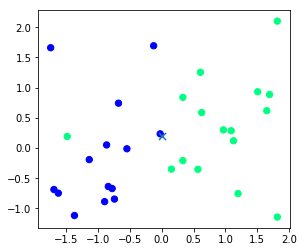

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 30,n_features=2, n_redundant=0, n_informative=1, class_sep=1,
                             n_clusters_per_class=1, random_state=1, n_classes=2)

plt.figure(figsize=(4.5,4));
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=40, cmap='winter');
plt.scatter(0,0.2, marker='x', s= 50);


If k = 3, then the object shown with an 'x' will be classified as "green" since the majority class among the set of 3 nearest neighbors of 'x' is "green".

We can also show the decision boundaries (also called Voronoi diagram) for the above example as follows:

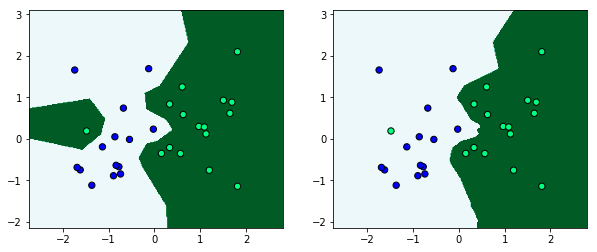

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_classification
fig, ax = plt.subplots(1,2,figsize=(10,4));

clf = KNeighborsClassifier(n_neighbors=1)
# You can play with n_neighbors
clf.fit(X, y)
plot_step = 0.02
n_classes = 2
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax[0].contourf(xx, yy, Z, cmap="BuGn")

ax[0].scatter(X[:, 0], X[:, 1], marker='o', c=y, s=40, cmap='winter',edgecolor='black');

 
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax[1].contourf(xx, yy, Z, cmap="BuGn")

ax[1].scatter(X[:, 0], X[:, 1], marker='o', c=y, s=40, cmap='winter',edgecolor='black');


### iris dataset

In [3]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=names)
iris.head()  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


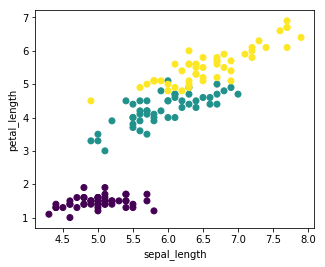

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
colors = le.transform(iris.species.values)

x=0;y=2;
# change x and y values to see scatter plots of different features

plt.figure(figsize=(5, 4))
plt.scatter(iris.iloc[:, x], iris.iloc[:, y],c=colors)
#plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(names[x]);
plt.ylabel(names[y]);


In [5]:
from sklearn.model_selection import train_test_split  
X = iris.iloc[:,0:3]
y = iris.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(n_neighbors=1)  
clf.fit(X_train, y_train);
y_pred = clf.predict(X_test)  
print(y_test.values)
print(y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


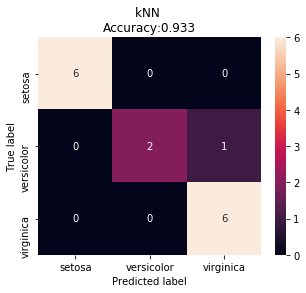

In [8]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score  
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [9]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.67      0.80         3
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.94      0.93      0.93        15



### K-NN Regression

(26, 1) (26,)
(3, 1) (3,)


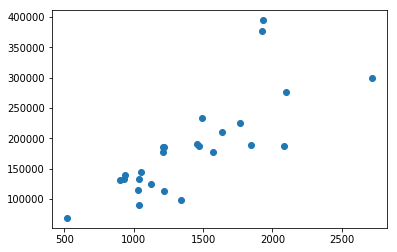

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train2 = train2.sample(frac=0.02)
X = train2[['GrLivArea']]
y = train2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

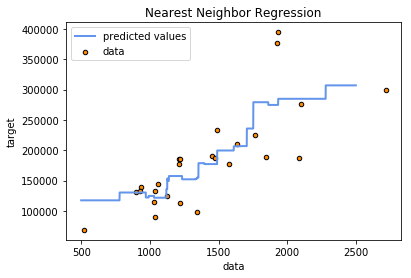

Train MAE: 35041.87692307692


In [11]:
from sklearn.neighbors import KNeighborsRegressor

# Fit regression model
regr = KNeighborsRegressor(n_neighbors=5)
#play with n_neighbors
regr.fit(X_train, y_train)

# Predict
X_test_line = np.arange(500, 2500, 1)[:, np.newaxis]
y_pred_line = regr.predict(X_test_line)
y_pred = regr.predict(X_train)

# Plot the results
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test_line, y_pred_line, color="cornflowerblue",
         label="predicted values", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Nearest Neighbor Regression")
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error
print("Train MAE:", mean_absolute_error(y_train, y_pred))


In [16]:
# Run Regression with top correlated 10 attributes with SalePrice
from sklearn.metrics import mean_squared_log_error
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

cors = train.corr(); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']
X = X.astype(float)


mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    # test set should be scaled with the scaler trained on the training set.
    X_test = scaler.transform(X_test)


    regr = KNeighborsRegressor(n_neighbors=5)
    model = regr.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))

print(top10)


Test MAE: 22453.419634703198
Test Kaggle-Score: 0.17875192710818535
Test MAPE: 13.100345502990377
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
